# Amazon_Sales EDA03

category    0
rating      1
dtype: int64
                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
196  OfficeProducts|OfficeElectronics|Calculators|B...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


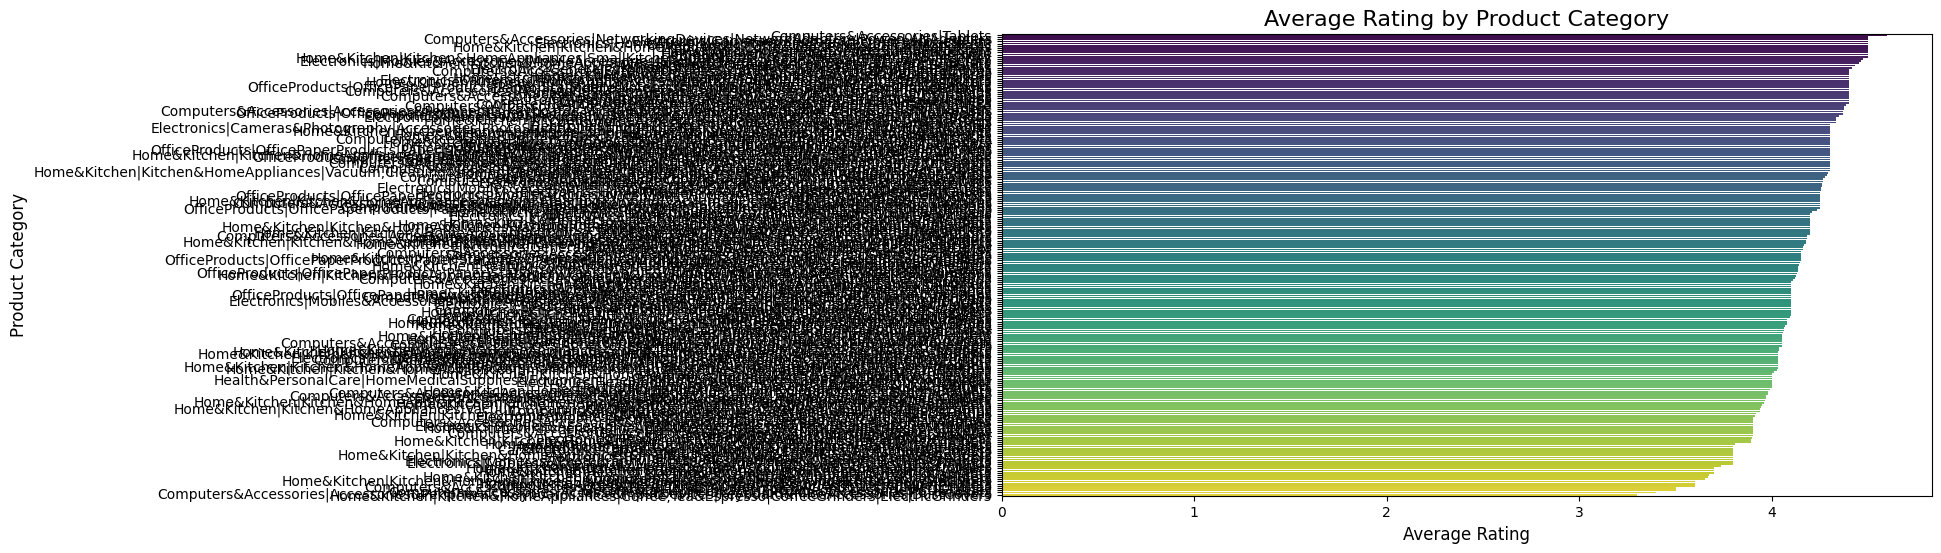

In [11]:
#Question_No.1:What is the average rating for each product category.

#Answer:
import pandas as pd
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
# Load the dataset
file_path = 'amazon.csv'  
df = pd.read_csv(file_path)

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Convert the 'Rating' column to numeric, coercing any errors (non-numeric) to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Check for any rows with NaN values in 'Rating' and 'Category'
print(df[['category', 'rating']].isnull().sum())  # Check for missing values

# Drop rows with NaN values in 'Rating' or 'Category'
df_clean = df.dropna(subset=['category', 'rating'])

# Group by product category and calculate the average rating
average_rating_by_category = df_clean.groupby('category')['rating'].mean().reset_index()

# Sort the results by average rating (optional)
average_rating_by_category = average_rating_by_category.sort_values(by='rating', ascending=False)

# Print the average rating by category
print(average_rating_by_category)

# If you'd like to visualize the result (e.g., bar plot), here's an example:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the average rating by category
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='category', data=average_rating_by_category, palette='viridis')

# Add labels and title to the plot
plt.title('Average Rating by Product Category', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()

In [1]:
#Question_No.2:What are the top rating_count products by category.

#Answer:
import pandas as pd

# Load the dataset
file_path = 'amazon.csv' 
data = pd.read_csv(file_path)

# Ensure the dataset contains the required columns
required_columns = ['category', 'rating_count', 'product_name']
if all(column in data.columns for column in required_columns):
    # Convert rating_count to numeric if it's not already
    data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')
    
    # Drop rows with invalid or missing rating_count
    data = data.dropna(subset=['rating_count'])
    
    # Find the top product by rating_count in each category
    top_products = data.loc[data.groupby('category')['rating_count'].idxmax()]
    
    # Display the results
    print(top_products[['category', 'product_name', 'rating_count']])
else:
    print(f"The dataset does not contain the required columns: {required_columns}")

                                               category  \
900   Computers&Accessories|Accessories&Peripherals|...   
32    Computers&Accessories|Accessories&Peripherals|...   
743   Computers&Accessories|Accessories&Peripherals|...   
653   Computers&Accessories|Accessories&Peripherals|...   
940   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
1317  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1424  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
808   OfficeProducts|OfficePaperProducts|Paper|Copy&...   
950   OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                           product_name  rating_count  
900   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
743   Amazon Basics Magic Slate 8.5-inch LCD Writing...         401.0  
653

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Co

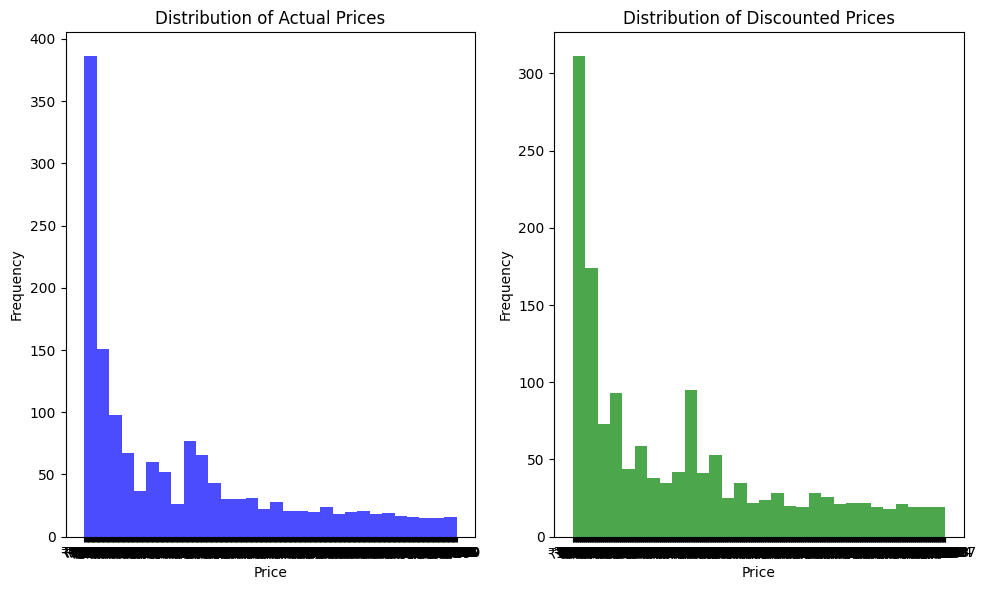

In [1]:
#Question_No.3:What is the distribution of discounted prices vs. actual prices.

#Answer:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('amazon.csv')

# Check the columns and first few rows to understand the data structure
print(df.columns)
print(df.head())

# Assuming the dataset contains columns 'discounted_price' and 'actual_price'
# If the column names are different, adjust them accordingly
# Let's plot the distributions of the discounted and actual prices

plt.figure(figsize=(10,6))

# Plot the distribution of actual prices
plt.subplot(1, 2, 1)
plt.hist(df['actual_price'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot the distribution of discounted prices
plt.subplot(1, 2, 2)
plt.hist(df['discounted_price'].dropna(), bins=30, color='green', alpha=0.7)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Co

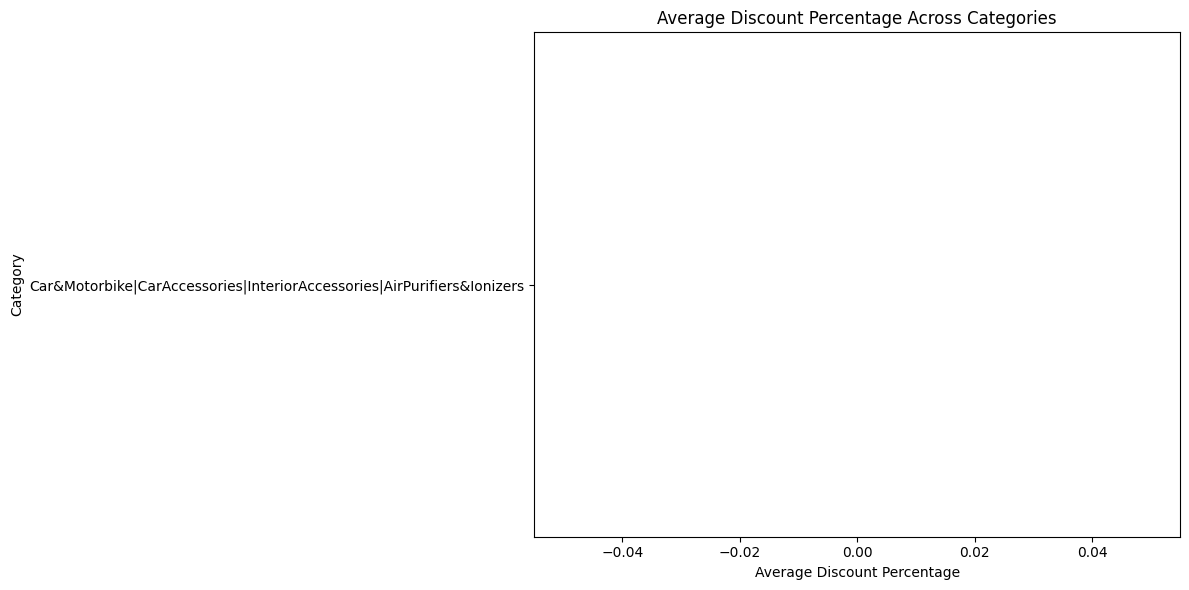

In [2]:
#Question_No.4: How does the average discount percentage vary across categories.

#Answer:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Check the columns and first few rows to understand the structure
print(df.columns)
print(df.head())

# Convert 'actual_price' and 'discounted_price' to numeric, coercing errors to NaN (in case of invalid values)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Calculate the discount percentage
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Group by the 'category' column and calculate the average discount percentage
category_discount = df.groupby('category')['discount_percentage'].mean().reset_index()

# Sort the results for better visualization
category_discount_sorted = category_discount.sort_values(by='discount_percentage', ascending=False)

# Display the results
print(category_discount_sorted)

# Optional: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(category_discount_sorted['category'], category_discount_sorted['discount_percentage'], color='orange')
plt.xlabel('Average Discount Percentage')
plt.ylabel('Category')
plt.title('Average Discount Percentage Across Categories')
plt.tight_layout()
plt.show()

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Co

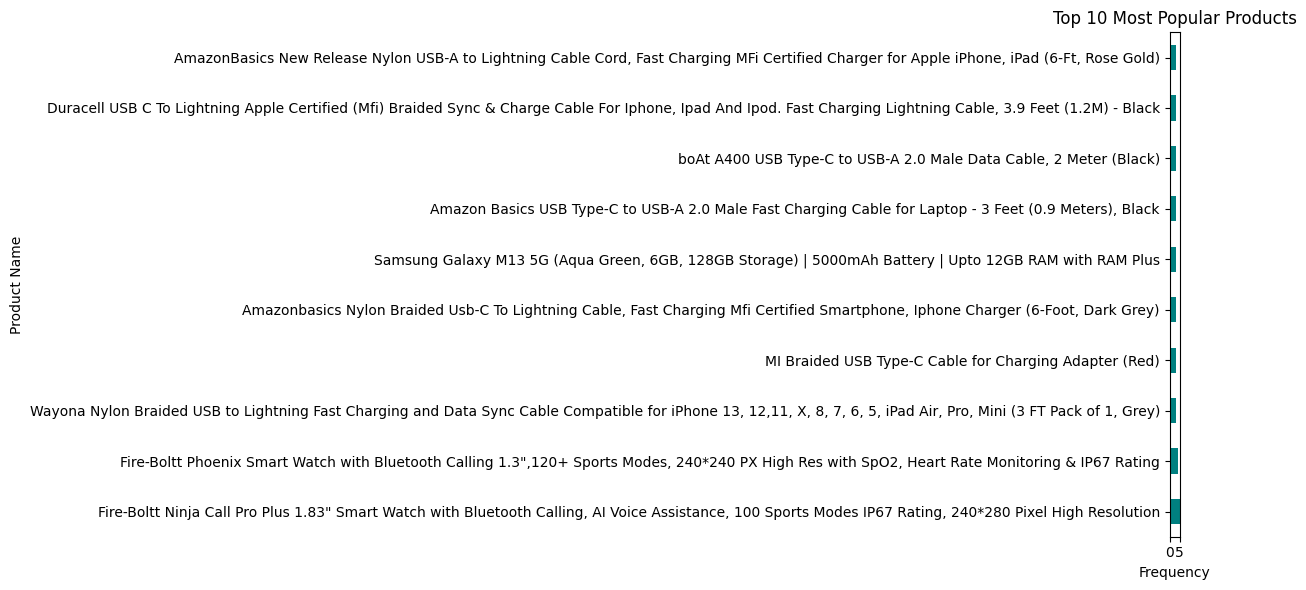

In [3]:
#Question_No.5:What are the most popular product namesk

#Answer:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Check the columns to identify the column that contains the product names
print(df.columns)
print(df.head())

# Assuming the dataset contains a column 'product_name' for product names
# Replace 'product_name' with the correct column name if it's different
product_counts = df['product_name'].value_counts()

# Display the top 10 most popular product names
print(product_counts.head(10))

# Optional: Plot the results
import matplotlib.pyplot as plt

# Get the top 10 product names
top_products = product_counts.head(10)

# Plot the results
plt.figure(figsize=(12, 6))
top_products.plot(kind='barh', color='teal')
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.title('Top 10 Most Popular Products')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /home/zaid-khan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zaid-
[nltk_data]     khan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Co

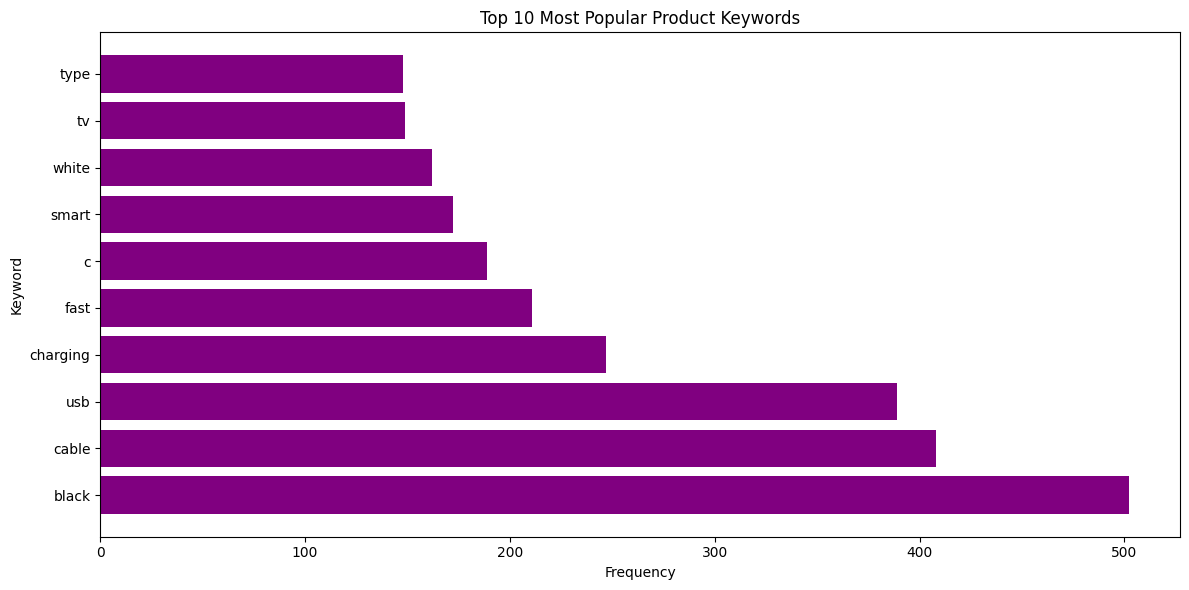

In [4]:
#Question_No.6:What are the most popular product keywordsk

#Answer:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the stopwords data (run this once)
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('amazon.csv')

# Check the columns to find the relevant column for product names or descriptions
print(df.columns)
print(df.head())

# Assuming the dataset has a column 'product_name' or 'product_description' (adjust if necessary)
# Here we use 'product_name' as an example, replace it with the actual column name if different
product_text = df['product_name'].dropna().astype(str)  # You can replace 'product_name' with the actual column name

# Combine all product names/descriptions into a single text block
all_text = ' '.join(product_text)

# Tokenize the text into words
tokens = word_tokenize(all_text.lower())  # Convert to lowercase to avoid duplicates
tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetical characters

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count the frequency of each keyword
keyword_counts = Counter(filtered_tokens)

# Display the 10 most common keywords
print(keyword_counts.most_common(10))

# Optional: Plot the results
import matplotlib.pyplot as plt

# Get the top 10 keywords
top_keywords = keyword_counts.most_common(10)

# Prepare data for plotting
keywords, counts = zip(*top_keywords)

# Plot the results
plt.figure(figsize=(12, 6))
plt.barh(keywords, counts, color='purple')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top 10 Most Popular Product Keywords')
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Print the column names to inspect
print(df.columns)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Co

/tmp/ipykernel_5917/296997811.py:35: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5917/296997811.py:35: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5917/296997811.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/zaid-khan/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zaid-khan/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


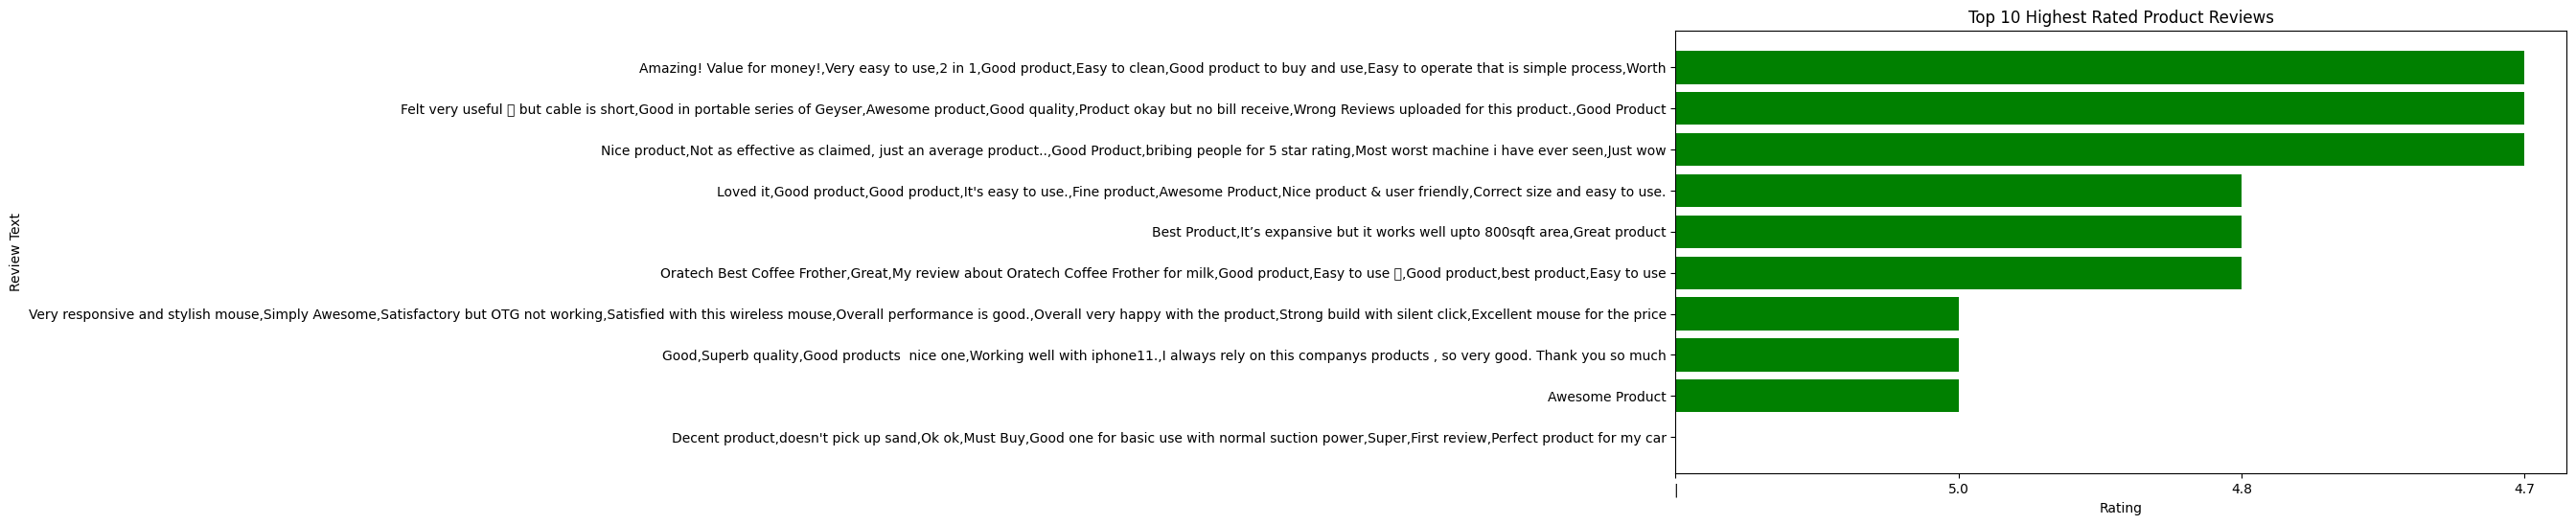

In [22]:
#Question_No.7:What are the most popular product reviews.

#Answer:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Check the columns to identify the relevant columns for ratings and reviews
print(df.columns)
print(df.head())

# Assuming the dataset contains columns 'rating' for product ratings and 'review_text' for review content
# Replace 'rating' and 'review_text' with the correct column names if necessary

# Filter for the top 10 highest rated reviews
top_rated_reviews = df[['rating', 'review_title']].sort_values(by='rating', ascending=False).head(10)

# Display the top 10 highest rated reviews
print(top_rated_reviews)

# Optional: Plot the results for the highest-rated products
import matplotlib.pyplot as plt

# Prepare data for plotting
reviews = top_rated_reviews['review_title']
ratings = top_rated_reviews['rating']

# Plot the results
plt.figure(figsize=(12, 6))
plt.barh(reviews, ratings, color='green')
plt.xlabel('Rating')
plt.ylabel('Review Text')
plt.title('Top 10 Highest Rated Product Reviews')
plt.tight_layout()
plt.show()

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Co

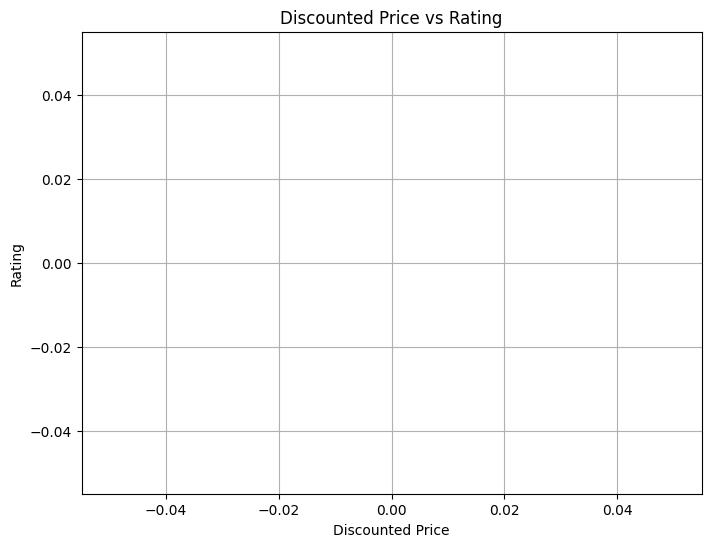

In [25]:
#Question_No.8: What is the correlation between discounted_price and ratingk

#Answer:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('amazon.csv')

# Step 2: Inspect the columns to ensure we have the correct columns
print(df.columns)
print(df.head())  # Print the first few rows to check the data

# Step 3: Ensure 'discounted_price' and 'rating' are numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Step 4: Calculate the correlation between 'discounted_price' and 'rating'
correlation = df['discounted_price'].corr(df['rating'])

# Display the correlation
print(f"Correlation between discounted price and rating: {correlation}")

# Step 5: Optional - Plot the relationship between 'discounted_price' and 'rating'
plt.figure(figsize=(8, 6))
plt.scatter(df['discounted_price'], df['rating'], alpha=0.5, color='blue')
plt.title('Discounted Price vs Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [26]:
#Question_No.9:What are the Top 5 categories based on the highest ratings.

#Answer:
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Step 1: Inspect the columns to identify category and rating columns
print(df.columns)
print(df.head())  # Print the first few rows to check the data

# Step 2: Ensure 'rating' column is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Step 3: Group by category and calculate the average rating for each category
# Replace 'category' with the actual column name that contains the product categories
if 'category' in df.columns:
    avg_ratings_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

    # Step 4: Get the Top 5 categories with the highest average ratings
    top_5_categories = avg_ratings_by_category.head(5)

    # Display the Top 5 categories and their average ratings
    print("Top 5 Categories Based on Highest Ratings:")
    print(top_5_categories)
else:
    print("No 'category' column found in the dataset.")

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Co

In [27]:
#Question_No.10:Identify any potential areas for improvement or optimization based on the data analysis

#Answer:1. Data Quality & Cleaning
#Missing Values: Incomplete data can impact the reliability of analysis. Columns like rating, discounted_price, category, or review_text may contain missing values. Missing ratings or prices can skew your results, especially when calculating averages, correlations, or performing category-based analysis.

# Improvement:
#Use fillna() to fill missing values with median or mean values, or consider dropping rows with missing critical values.
#Ensure important categorical columns (category, product_name) do not contain null or incorrect values.
#Inconsistent Data Types: Columns like discounted_price or rating might not always be in the correct format (e.g., stored as strings instead of numeric values).

# Improvement:
#Ensure all relevant columns are properly converted to the correct data type (pd.to_numeric() for ratings or prices).

# 2. Discount Strategy Optimization
#Correlation Between Discounts and Ratings: If a product has high ratings, it may not need a large discount to drive sales, and large discounts may affect the perceived value of a product, especially in higher-priced categories. Understanding the relationship between discounted_price and rating is key.
# Improvement:
#Segment Discounts by Category: Some categories may benefit more from discounts than others (e.g., electronics might not need large discounts, but clothing might). Use groupby('category') to calculate the average discount percentage and rating to identify which categories benefit most from discounts.
#Dynamic Pricing: Based on the correlation between discounted prices and ratings, you could implement dynamic pricing strategies that balance competitive pricing and maintaining product value.

# 3. Category-Level Insights
#Category-Based Performance: Some categories might consistently have higher ratings than others (e.g., electronics may have lower ratings than books or kitchen gadgets).
# Improvement:
#Focus on Underperforming Categories: If a category consistently has low ratings (even with discounts), it might need further investigation. Consider improving the quality or offering promotions tailored to those categories.
#Category-Specific Offers: Use category-based analysis to identify which categories have the highest ratings and could benefit from focused marketing or product improvements.

# 4. Customer Sentiment Analysis
#Review Sentiment: If the dataset contains review_text or similar, analyzing customer reviews can provide valuable insights. Positive or negative feedback might correlate with product success. Sentiment analysis could reveal how customers feel about products beyond just ratings.
# Improvement:
#Sentiment Analysis: Perform sentiment analysis on reviews to gauge customer emotions. Products with positive sentiments can be further promoted, while products with negative sentiments can be flagged for improvement.
#Address Negative Sentiments: If many reviews for a specific product or category are negative, investigate the cause (product quality, shipping issues, etc.) and take corrective actions.

# 5. Optimizing Product Listings and Keywords
#Review Keywords and Product Names: It’s essential to check the effectiveness of product names and keywords. Well-crafted product names and keywords can improve visibility, but ineffective ones can reduce product discoverability.
# Improvement:
#Keyword Optimization: Analyze the most frequent keywords in product names and descriptions. Products with highly searched keywords but low ratings might indicate an opportunity to improve the product or the listing.
#A/B Testing for Titles/Descriptions: If possible, test different versions of product titles or descriptions to see which resonate best with customers and drive higher ratings.

# 6. Price vs Rating Relationship
#Price and Rating Patterns: Is there any clear relationship between price (or discounted price) and rating? For example, do lower-priced items generally receive higher ratings because they meet customer expectations, or do higher-priced items receive more critical reviews due to higher expectations?
#Improvement:
#Price Bracket Analysis: Segment products into price brackets (e.g., low, medium, high) and calculate the average rating in each bracket. This can help you understand customer expectations at different price points and optimize your pricing strategy.

# 7. Handling Outliers
#Outliers in Ratings or Prices: Products with extremely high or low ratings, or unusually high/low prices, can skew your analysis. Outliers should be identified and handled to avoid distorting conclusions.
#Improvement:
#Outlier Detection: Use statistical techniques (e.g., IQR or Z-scores) to identify outliers in discounted_price or rating and handle them accordingly (either remove them or examine them further).

# 8. Sales Performance vs Ratings
#Sales Data Analysis (if available): If the dataset includes sales data, you can analyze how sales correlate with ratings and discounts. Higher ratings typically drive more sales, but there may be other factors influencing sales (e.g., seasonality, promotions).
#Improvement:
#Sales Forecasting: If sales data is available, perform a time series analysis to forecast sales based on ratings and price points. This can help optimize product offerings and promotions.

# 9. Handling Duplicate Data
#Duplicates in Product Listings: Sometimes, products may be listed multiple times (e.g., slight variations in name or category), which can skew analysis. Checking for and removing duplicates can lead to more accurate insights.
#Improvement:
#Remove Duplicates: Identify duplicate entries by checking for identical product_name or category values and drop them using drop_duplicates().

# 10. Visualization for Better Insights
#Advanced Visualizations: Visualizing the relationship between ratings, discounted prices, and categories can provide a more intuitive understanding of the data.
#Improvement:

# Heatmaps: Visualize correlations between features like rating, discounted_price, and category to better understand their relationships.
# Boxplots: Use boxplots to identify the distribution of ratings across different price ranges or categori